In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy import stats


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
# Exploratory Data Analysis (EDA)
print("=" * 50)
print("Dataset Overview")
print("=" * 50)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\nData Information:")
print(df.info())

print("\nChecking for missing values:")
print(df.isnull().sum())


print("\nStatistical Summary of Numerical Features:")
print(df.describe())

# Count of categorical values
print("\nCount of Categorical Values:")
print("\nSex:")
print(df['sex'].value_counts())
print("\nSmoker:")
print(df['smoker'].value_counts())
print("\nRegion:")
print(df['region'].value_counts())

Dataset Overview
Dataset Shape: (1338, 7)

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None



Data Visualization


Text(0, 0.5, 'Frequency')

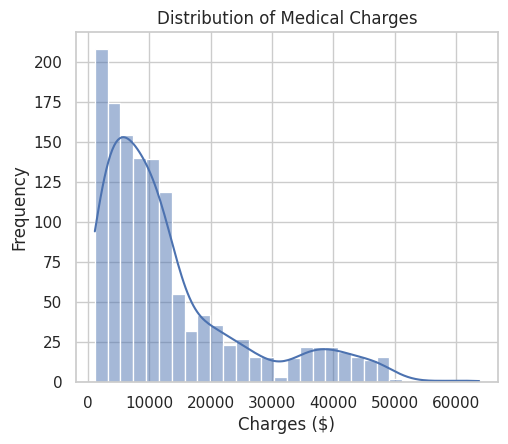

In [ ]:
# 3. Visualize the data
print("\n" + "=" * 50)
print("Data Visualization")
print("=" * 50)


plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')



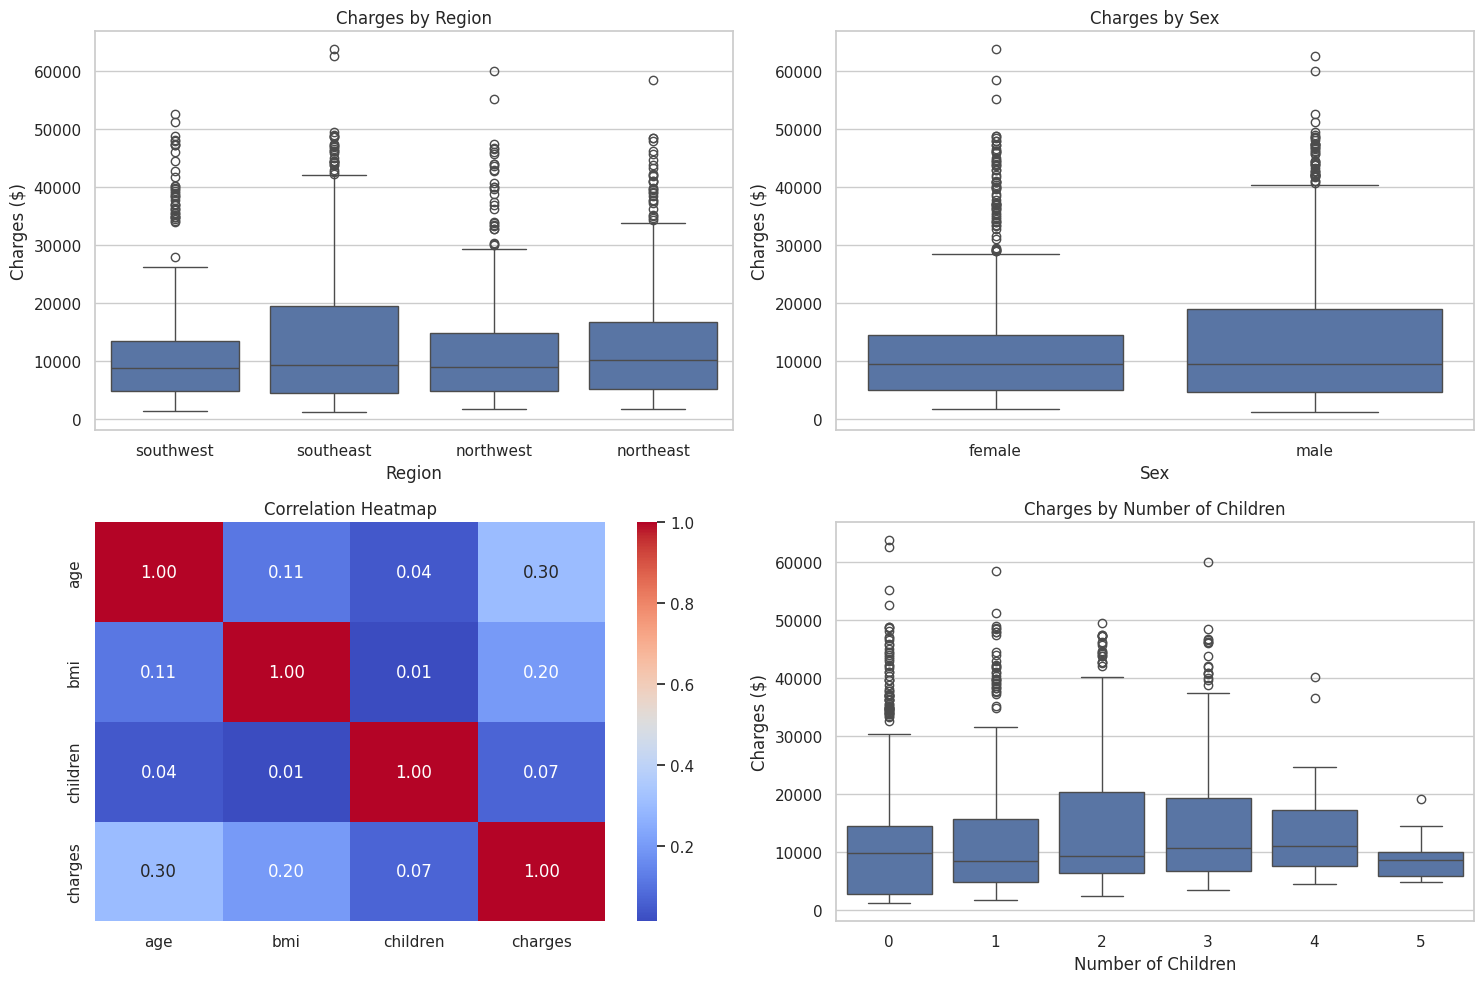

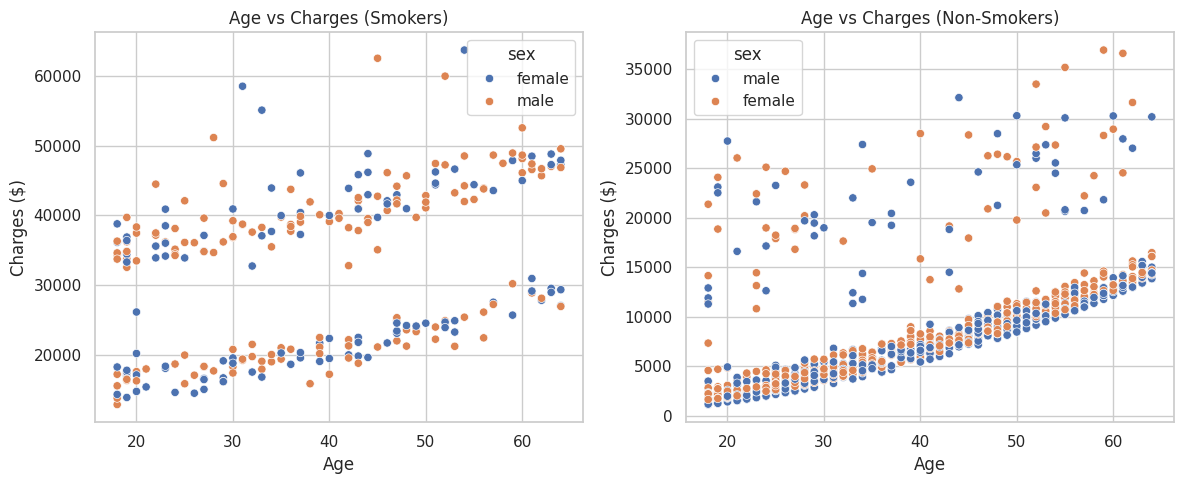

In [ ]:

plt.figure(figsize=(15, 10))

# Charges by region
plt.subplot(2, 2, 1)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges ($)')

# Charges by sex
plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges ($)')


# Correlation heatmap for numeric features only
plt.subplot(2, 2, 3)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# Charges by number of children (dependents)
plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges ($)')

plt.tight_layout()
plt.show()

# Deeper analysis of smoker impact on charges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', data=df[df['smoker'] == 'yes'], hue='sex')
plt.title('Age vs Charges (Smokers)')
plt.xlabel('Age')
plt.ylabel('Charges ($)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='charges', data=df[df['smoker'] == 'no'], hue='sex')
plt.title('Age vs Charges (Non-Smokers)')
plt.xlabel('Age')
plt.ylabel('Charges ($)')

plt.tight_layout()
plt.show()

In [ ]:
# 4. Data Preparation for Model Training
print("\n" + "=" * 50)
print("Data Preparation for Model Training")
print("=" * 50)


data = df.copy()

# Convert categorical variables to numeric using one-hot encoding
categorical_features = ['sex', 'smoker', 'region']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print("Dataset after one-hot encoding:")
print(data.head())

# Define the features (X) and target variable (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Checking for outliers in the target variable
z_scores = stats.zscore(y)
threshold = 3
outliers = (abs(z_scores) > threshold)
print(f"\nNumber of outliers in charges: {np.sum(outliers)}")

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Data Preparation for Model Training
Dataset after one-hot encoding:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

Number of outliers in charges: 7
Training set shape: (1070, 8)
Testing set shape: (268, 8)



Model Training
Model Coefficients:
age: 256.98
bmi: 337.09
children: 425.28
sex_male: -18.59
smoker_yes: 23651.13
region_northwest: -370.68
region_southeast: -657.86
region_southwest: -809.80
Intercept: -11931.22

Model Evaluation
Training set results:
MSE: 37277681.70
RMSE: 6105.55
R²: 0.74

Test set results:
MSE: 33596915.85
RMSE: 5796.28
R²: 0.78


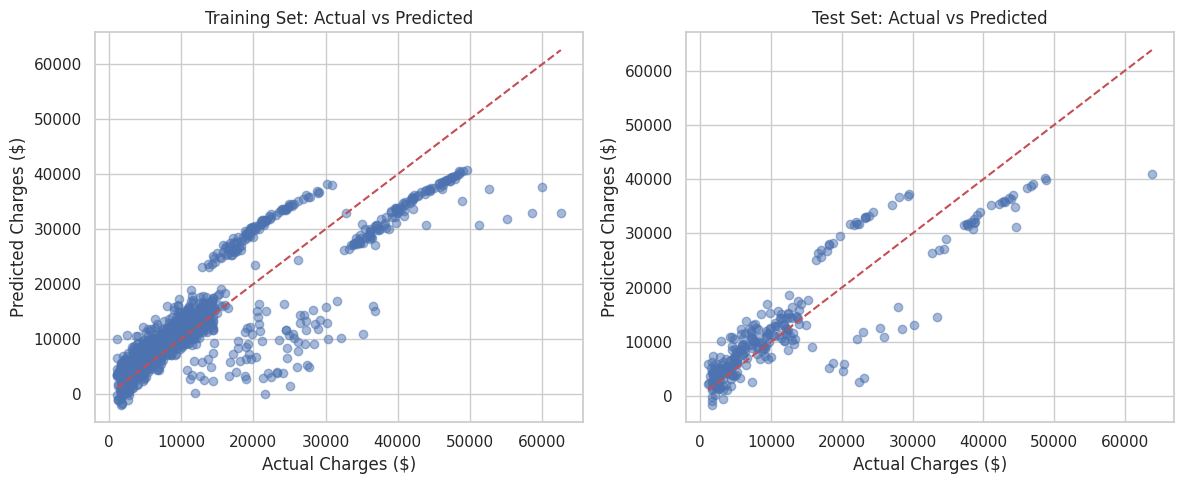

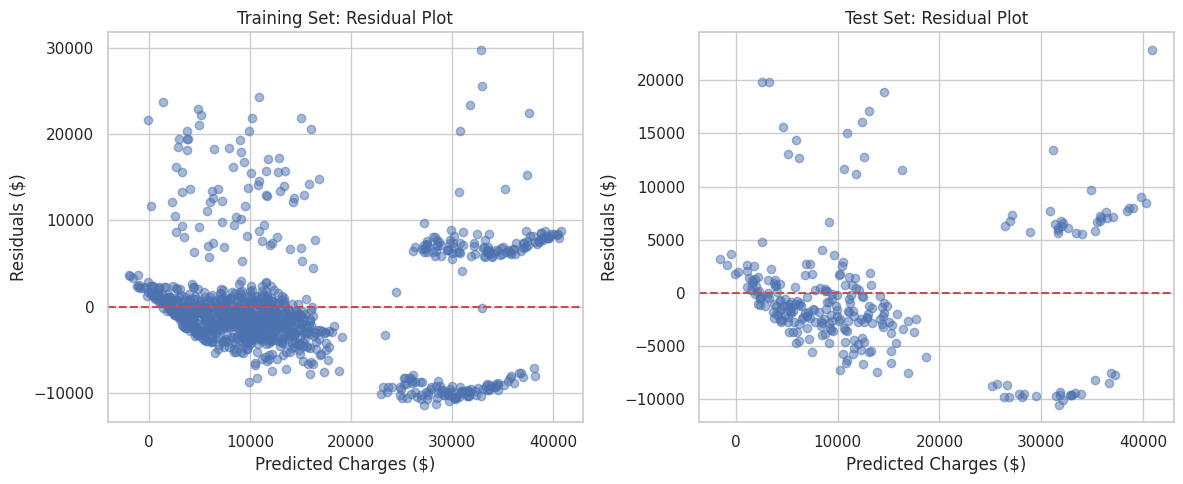

In [ ]:
# 5. Model Training
print("\n" + "=" * 50)
print("Model Training")
print("=" * 50)

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:")
for feature, coef in zip(X_train.columns, lr_model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {lr_model.intercept_:.2f}")

# 6. Model Evaluation
print("\n" + "=" * 50)
print("Model Evaluation")
print("=" * 50)

# Make predictions on the training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training set results:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")

print(f"\nTest set results:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

# Visualize the predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')

plt.tight_layout()
plt.show()

# Residual Analysis
plt.figure(figsize=(12, 5))

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Training Set: Residual Plot')
plt.xlabel('Predicted Charges ($)')
plt.ylabel('Residuals ($)')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Test Set: Residual Plot')
plt.xlabel('Predicted Charges ($)')
plt.ylabel('Residuals ($)')

plt.tight_layout()
plt.show()

In [ ]:
# 7. Inference with the trained model
print("\n" + "=" * 50)
print("Making Predictions with the Trained Model")
print("=" * 50)

# Create a function to predict insurance costs for new customers
def predict_insurance_cost(age, sex, bmi, children, smoker, region):
    # Create a sample dataframe with the input values
    sample = pd.DataFrame({
        'age': [age],
        'bmi': [bmi],
        'children': [children]
    })

    # Add one-hot encoded features
    sample['sex_male'] = 1 if sex == 'male' else 0
    sample['smoker_yes'] = 1 if smoker == 'yes' else 0

    # Add region one-hot encoded features
    sample['region_northwest'] = 1 if region == 'northwest' else 0
    sample['region_southeast'] = 1 if region == 'southeast' else 0
    sample['region_southwest'] = 1 if region == 'southwest' else 0

    # Make sure columns are in the same order as training data
    sample = sample[X_train.columns]

    # Predict the insurance cost
    predicted_cost = lr_model.predict(sample)[0]

    return predicted_cost

# Example predictions
examples = [
    {"age": 30, "sex": "male", "bmi": 22.5, "children": 0, "smoker": "no", "region": "northeast"},
    {"age": 45, "sex": "female", "bmi": 30.2, "children": 2, "smoker": "yes", "region": "southwest"},
    {"age": 60, "sex": "male", "bmi": 25.7, "children": 1, "smoker": "no", "region": "southeast"}
]

print("Example predictions:")
for i, example in enumerate(examples):
    prediction = predict_insurance_cost(
        example["age"],
        example["sex"],
        example["bmi"],
        example["children"],
        example["smoker"],
        example["region"]
    )
    print(f"Example {i+1}:")
    print(f"  Details: {example}")
    print(f"  Predicted Insurance Cost: ${prediction:.2f}")


Making Predictions with the Trained Model
Example predictions:
Example 1:
  Details: {'age': 30, 'sex': 'male', 'bmi': 22.5, 'children': 0, 'smoker': 'no', 'region': 'northeast'}
  Predicted Insurance Cost: $3344.04
Example 2:
  Details: {'age': 45, 'sex': 'female', 'bmi': 30.2, 'children': 2, 'smoker': 'yes', 'region': 'southwest'}
  Predicted Insurance Cost: $33504.77
Example 3:
  Details: {'age': 60, 'sex': 'male', 'bmi': 25.7, 'children': 1, 'smoker': 'no', 'region': 'southeast'}
  Predicted Insurance Cost: $11899.42



Feature Importance Analysis


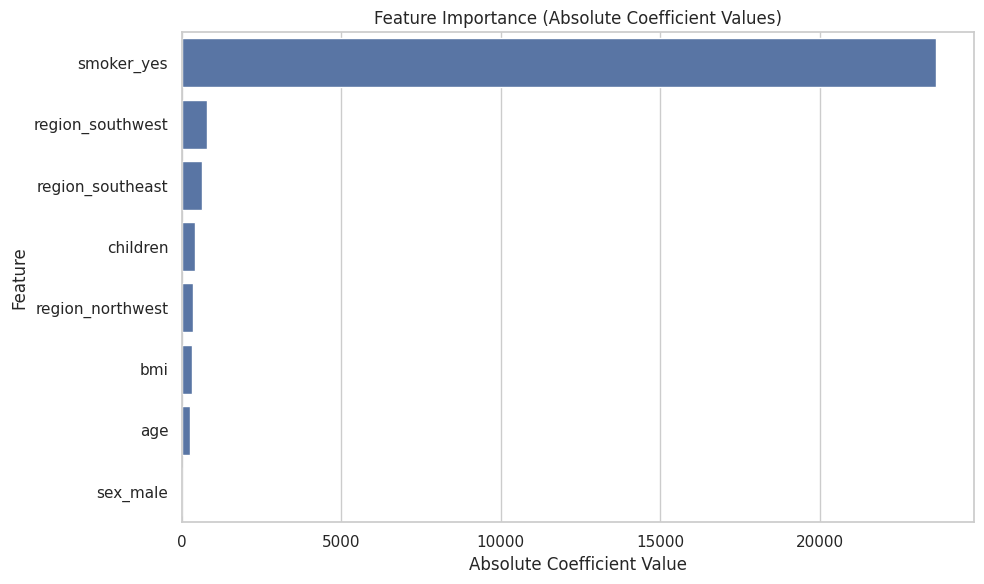

Feature importance (sorted by absolute coefficient value):
smoker_yes: 23651.13
region_southwest: -809.80
region_southeast: -657.86
children: 425.28
region_northwest: -370.68
bmi: 337.09
age: 256.98
sex_male: -18.59


In [ ]:
# 8. Feature Importance Analysis
print("\n" + "=" * 50)
print("Feature Importance Analysis")
print("=" * 50)

# Get the absolute coefficients and sort them
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature importance (sorted by absolute coefficient value):")
for index, row in coef_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.2f}")

In [ ]:
print("""
Key findings from our analysis:
1. The model achieved an R² score of {:.2f} on the test data, indicating that {:.1f}% of the variance in insurance costs is explained by our model.
2. Smoking status is the most significant factor affecting insurance costs.
3. Age and BMI also have substantial effects on insurance costs.
4. The residual plots show some heteroscedasticity, refers to a situation where the variance of the error terms (residuals) is not constant across all observations. This violates one of the key assumptions of the classical linear regression model, which assumes that the error terms have a constant variance (homoscedasticity). , suggesting that a linear model might not capture all patterns in the data.

Potential improvements:
1. Try polynomial features or interaction terms to capture non-linear relationships.
2. Explore other regression algorithms like Random Forest or Gradient Boosting.
3. Perform feature engineering to create more informative features.
""".format(test_r2, test_r2*100))


Key findings from our analysis:
1. The model achieved an R² score of 0.78 on the test data, indicating that 78.4% of the variance in insurance costs is explained by our model.
2. Smoking status is the most significant factor affecting insurance costs.
3. Age and BMI also have substantial effects on insurance costs.
4. The residual plots show some heteroscedasticity, refers to a situation where the variance of the error terms (residuals) is not constant across all observations. This violates one of the key assumptions of the classical linear regression model, which assumes that the error terms have a constant variance (homoscedasticity). , suggesting that a linear model might not capture all patterns in the data.

Potential improvements:
1. Try polynomial features or interaction terms to capture non-linear relationships.
2. Explore other regression algorithms like Random Forest or Gradient Boosting.
3. Perform feature engineering to create more informative features.

